<a href="https://colab.research.google.com/github/ocatalanh/och_datascience/blob/main/UDD_Proyecto_M4_Modelado_no_supervisado_Omar_Catalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# Desarrollo

## Primera Parte EDA

In [2]:
#Descargamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

In [3]:
#Descargamos el dataset y lo leemos. El dataset se encuentra en repositorio de github para tenerlo en linea
url = "https://raw.githubusercontent.com/ocatalanh/och_datascience/main/ProyectoM4_Modelado_no_supervisado/costumers.csv"
df = pd.read_csv(url)
df

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0
...,...,...,...,...,...,...
495,9065.13,0,1,42479.96,0.0,0
496,13175.69,1,0,100968.56,19.3,1
497,15004.61,0,1,7726.65,0.0,0
498,17148.91,1,0,30516.46,0.0,1


In [4]:
#Vericamos la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [5]:
#Verificamos la completitud por columnas
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total nulos"})
completitud["completitud"] = (1 - completitud["total nulos"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total nulos,completitud
0,Salario,0,100.0
1,Credito_tipo_1,0,100.0
2,Credito_tipo_2,0,100.0
3,Limite_TC,0,100.0
4,Tiempo_cliente,0,100.0
5,Producto_ofrecido,0,100.0


In [6]:
#Verificamos la forma que tiene el datset
df.shape

(500, 6)

In [7]:
#Verificamos cuantos datos posee el dataset
df.size

3000

In [8]:
#Verificamos los datos estadisticos de las columnas numericas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


In [9]:
#Creamos una variable que almacene los datos duplicado y verificamos su forma.
duplicados = df[df.duplicated()]
duplicados.shape

(0, 6)

In [10]:
#Desplegamos cuantos datos duplicados tenemos
cantidad_duplicados = duplicados.shape[0]
print(f"Hay {cantidad_duplicados} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


In [11]:
#Verificamos las columnas duplicadas y desplegamos mensaje si es que hay duplicadas.
columnas_duplicadas = df.columns[df.columns.duplicated(keep=False)]
mensaje = f"Las columnas duplicadas son: {list(columnas_duplicadas)}" if any(columnas_duplicadas) else "No hay columnas duplicadas en el DataFrame."
print(mensaje)

No hay columnas duplicadas en el DataFrame.


In [12]:
#Verificasmos cuantas columnas por cada tipo de datos
print('Las categorias de las columnas se distribuyen de la siguinte forma:')
print(f'\n{df.dtypes.value_counts()}')

Las categorias de las columnas se distribuyen de la siguinte forma:

float64    3
int64      3
dtype: int64


In [13]:
#Separamos las columnas numericas de las categoricas
col_numericas = df.select_dtypes(include=['float64','int']).columns
col_categoricas = df.select_dtypes(include=['object']).columns

print(f'Hay un total de {len(col_numericas)} columnas numericas:\n {col_numericas}\n\n')
print(f'Hay un total de {len(col_categoricas)} columnas categoricas:\n {col_categoricas}')

Hay un total de 6 columnas numericas:
 Index(['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC',
       'Tiempo_cliente', 'Producto_ofrecido'],
      dtype='object')


Hay un total de 0 columnas categoricas:
 Index([], dtype='object')


In [14]:
#Separamos los nombres de las columnas por tipo de datos
grupos_tipos = df.columns.to_series().groupby(df.dtypes).groups

print("Los nombres de las columnas agrupadas por tipo de dato son:")
for tipo, columnas in grupos_tipos.items():
    print(f"\nTipo de Dato: {tipo}")
    print(list(columnas))

Los nombres de las columnas agrupadas por tipo de dato son:

Tipo de Dato: int64
['Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']

Tipo de Dato: float64
['Salario', 'Limite_TC', 'Tiempo_cliente']


In [15]:
#Verificamos la correlacion que hay entre las columnas
corr = df[col_numericas].corr()
corr.style.background_gradient(cmap='coolwarm')

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
Salario,1.000000,0.227220,-0.529221,-0.341786,-0.046269,0.031765
Credito_tipo_1,0.227220,1.000000,-0.713460,0.392836,0.126244,-0.013487
Credito_tipo_2,-0.529221,-0.713460,1.000000,-0.155504,-0.125954,0.124177
Limite_TC,-0.341786,0.392836,-0.155504,1.000000,0.705074,0.269304
Tiempo_cliente,-0.046269,0.126244,-0.125954,0.705074,1.000000,0.073490
Producto_ofrecido,0.031765,-0.013487,0.124177,0.269304,0.073490,1.000000


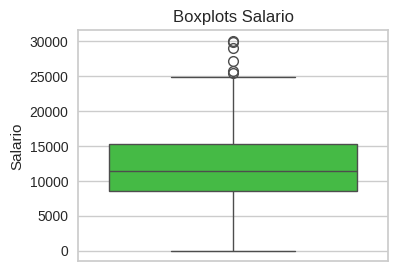

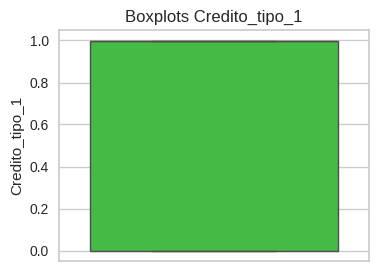

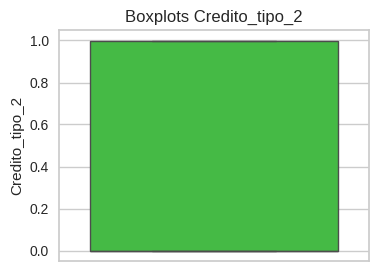

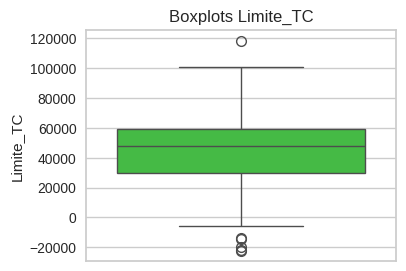

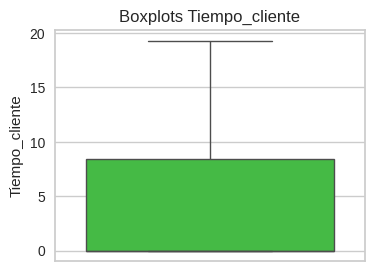

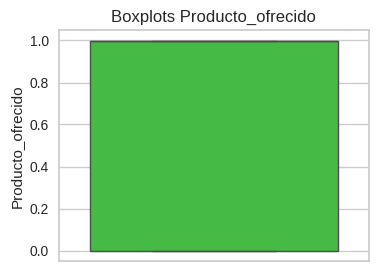

In [51]:
#Desplegamos un grafico boxplots por cada columna numerica
for i in col_numericas:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df[i], color='limegreen')
    #plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
    plt.title(f"Boxplots {i}")
    plt.show()

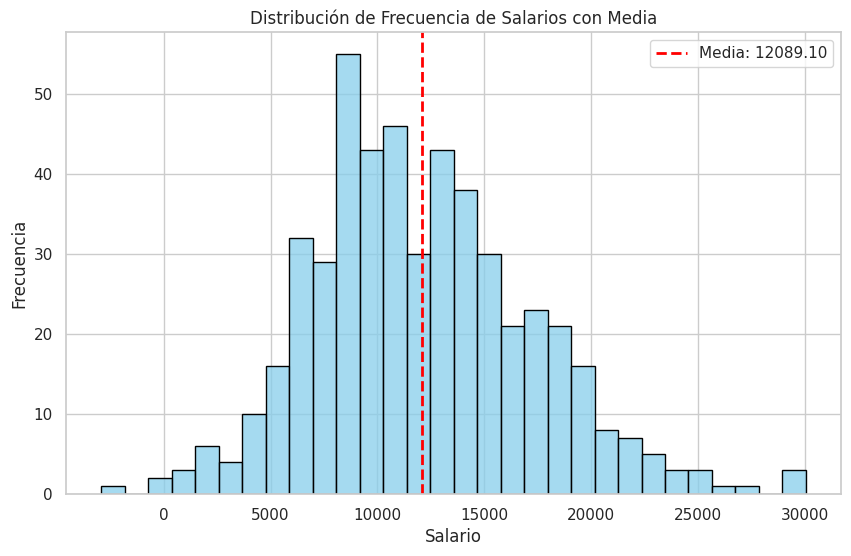

In [17]:
# Trabajamos sobre la columna Salario
# Creamos un gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizamos el método histplot de Seaborn para el gráfico de frecuencia con intervalos
sns.histplot(data=df, x="Salario", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregamos una línea vertical para la media
mean_salary = df["Salario"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustamos la presentación del gráfico
plt.title("Distribución de Frecuencia de Salarios con Media")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.legend()

# Mostramos el gráfico
plt.show()

In [18]:
# Verificamos los valores outlier en columna Salario
print(df[df['Salario']<=0].sort_values('Salario'))

     Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
472 -2911.65               1               1    86358.8             0.0   

     Producto_ofrecido  
472                  1  


In [19]:
#Verificado que hay un dato negativo en la columna Salario se eliminó
df.drop(472, axis=0, inplace=True)

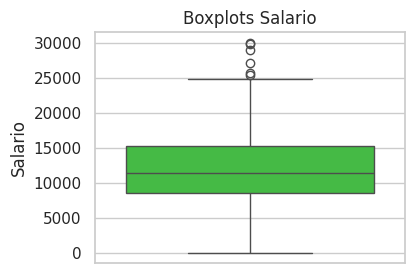

In [20]:
#Volvemos a ver el boxplot de la columna Salario
plt.figure(figsize=(4, 3))
sns.boxplot(data=df['Salario'], color='limegreen')
#plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.title(f"Boxplots Salario")
plt.show()

In [21]:
#Verificamos cuales son los datos sobre los 25.000 de la columna Salario
print(df[df['Salario']>=25000].sort_values('Salario'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
37   25410.61               1               0   19522.62             0.0   
334  25674.50               1               0   50270.77             8.5   
325  27175.58               1               0    4856.15             0.0   
319  28951.02               1               0    2066.41             0.0   
478  29868.76               0               0  -22207.95             0.0   
91   30041.40               1               0   -1337.42             0.0   

     Producto_ofrecido  
37                   1  
334                  1  
325                  0  
319                  1  
478                  1  
91                   0  


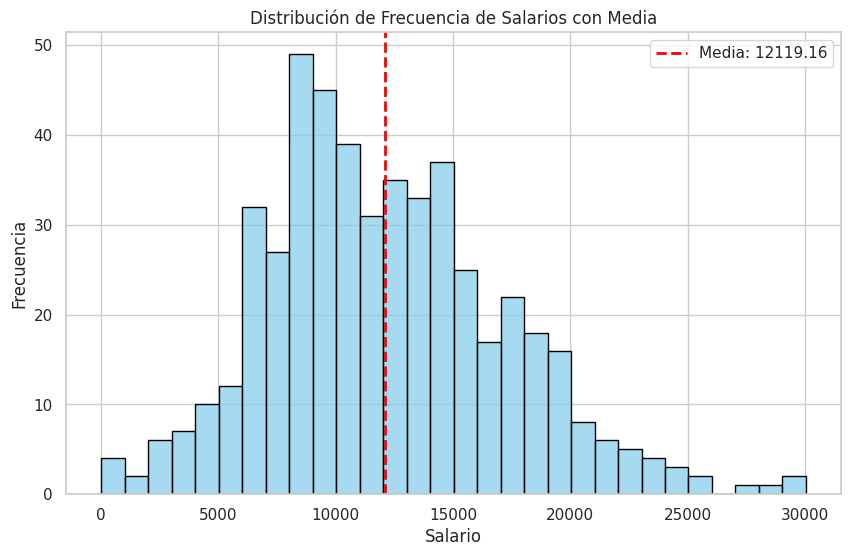

In [22]:
# Volvemos a ver el histogtrama de la columna Salario
# Creamos el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizamos el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajustamos el número de bins
sns.histplot(data=df, x="Salario", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregamos una línea vertical para la media
mean_salary = df["Salario"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustamos la presentación del gráfico
plt.title("Distribución de Frecuencia de Salarios con Media")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.legend()

# Mostramos el gráfico
plt.show()

### Nota aclaratoria
Se decidió dejar sin alterar los valor sobre los 25.0000 en la columna 'Salario', ya que a pesar de ser valores infrecuentes, no se escapan de la realidad de 'Salarios' en el contexto dado.


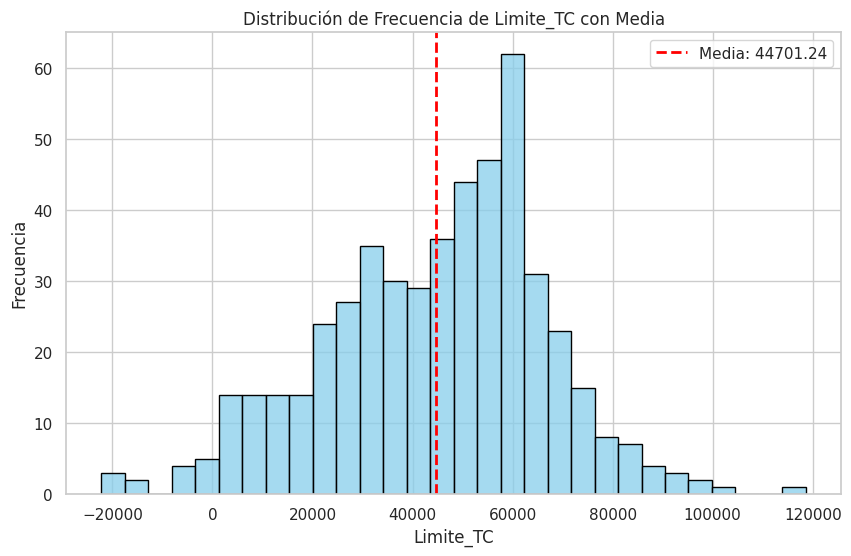

In [23]:
# Trabajamos sobre la columna Limite_TC
# Creamos el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizamos el método histplot de Seaborn para el gráfico de frecuencia con intervalos
sns.histplot(data=df, x="Limite_TC", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregamos una línea vertical para la media
mean_salary = df["Limite_TC"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustamos la presentación del gráfico
plt.title("Distribución de Frecuencia de Limite_TC con Media")
plt.xlabel("Limite_TC")
plt.ylabel("Frecuencia")
plt.legend()

# Mostramos el gráfico
plt.show()

In [24]:
# Verificamos los valores outlier en columna Limite_TC
print(df[df['Limite_TC']<=0].sort_values('Limite_TC'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
478  29868.76               0               0  -22207.95             0.0   
133  17400.43               0               1  -22182.75             0.0   
210  15035.73               0               1  -19952.85             0.0   
184   7823.26               0               1  -14786.24             0.0   
341  20895.92               0               1  -13930.96             0.0   
79   24592.73               1               0   -5897.92             0.0   
212   8896.39               1               0   -5148.28             0.0   
235   9445.21               0               1   -4748.86             0.0   
413  21511.46               0               0   -4199.00             0.0   
47   24295.71               1               0   -2716.47             0.0   
373   7940.18               0               1   -2111.20             0.0   
91   30041.40               1               0   -1337.42             0.0   
228  16321.8

In [25]:
#Verificamos que porcentaje del total de datos, corresponden a los valores negativos de la columna Limite_TC
Limite_TC_negativos = df[df['Limite_TC']<0].sort_values('Limite_TC')
porcentaje = round(Limite_TC_negativos.shape[0]/df.shape[0]*100,2)
print(f'El {porcentaje}% de la información, correspondeN a datos negativos de la columna Limite_TC, correspondiendo a {Limite_TC_negativos.shape[0]} filas.')

El 2.61% de la información, correspondeN a datos negativos de la columna Limite_TC, correspondiendo a 13 filas.


### Nota Aclaratoria
Consultado al banco respecto los **valores negativos** en el **Limite de Credito de la Tarjeta** de los clientes, señalaron que no puede haber un limite negativo, correspondienDO estos valores a errores de registro, sin embargo tampoco pueden asegurar que sea solo un error de simbolo (-), desconociendo mayores detalles de los errores de registro. Dicho lo anterior, **se determinó eliminar los valores negativos.**

In [34]:
#Se crea un nuevo dataframe filtrando solo los valores positivos para la columna Limite_TC
df_clean = df[df['Limite_TC'] >= 0]
df_clean.head()


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


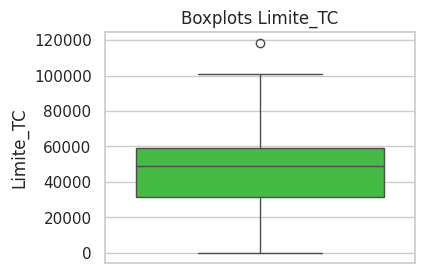

In [27]:
#Se crea un nuevo boxplots para la columna Limite_TC
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_clean['Limite_TC'], color='limegreen')
#plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.title(f"Boxplots Limite_TC")
plt.show()

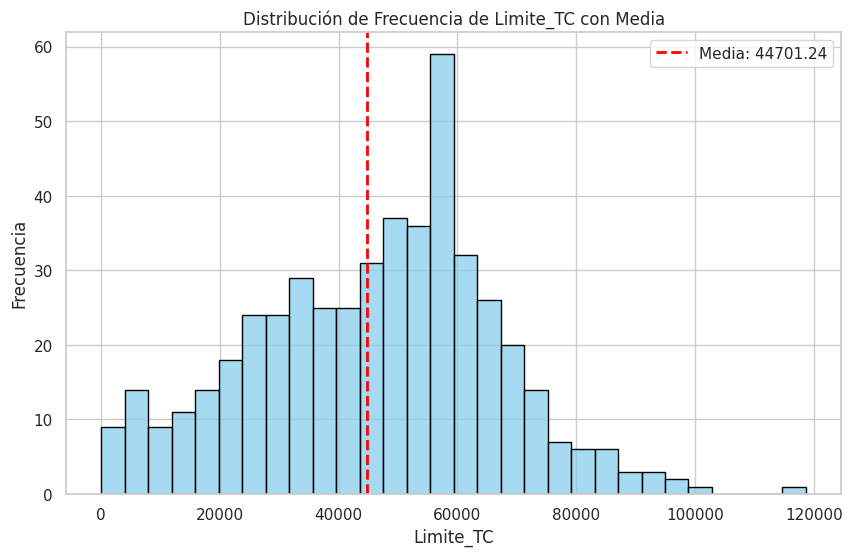

In [28]:
#Se crea un nuevo grafico de histograma para la columna Limite_TC

# Se Crea el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Se Utiliza el método histplot de Seaborn para el gráfico de frecuencia con intervalos
sns.histplot(data=df_clean, x="Limite_TC", bins=30, kde=False, color="skyblue", edgecolor="black")

# Se Agrega una línea vertical para la media
mean_salary = df["Limite_TC"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Se Ajusta la presentación del gráfico
plt.title("Distribución de Frecuencia de Limite_TC con Media")
plt.xlabel("Limite_TC")
plt.ylabel("Frecuencia")
plt.legend()

# Se Muestra el gráfico
plt.show()

In [35]:
#Se verifica los datos estadisticos de las columnas
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,486.0,11961.710617,4900.978715,18.11,8520.8900,11413.825,14984.0550,28951.02
Credito_tipo_1,486.0,0.617284,0.486551,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,486.0,0.456790,0.498643,0.00,0.0000,0.000,1.0000,1.00
Limite_TC,486.0,46142.800761,20485.313760,83.87,31168.9475,48826.915,59255.0025,118636.82
Tiempo_cliente,486.0,4.451646,4.795718,0.00,0.0000,5.100,8.5000,19.30
Producto_ofrecido,486.0,0.611111,0.488000,0.00,0.0000,1.000,1.0000,1.00


In [30]:
# Verificamos los  valores outlier en columna Limite_TCsobre 100.000
print(df[df['Limite_TC']>=100000].sort_values('Limite_TC'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
496  13175.69               1               0  100968.56            19.3   
188   5052.04               1               1  118636.82            17.8   

     Producto_ofrecido  
496                  1  
188                  1  


### Nota Aclaratoria
Se determina **mantener los valores sobre los 100.0000**, ya que corresponden a valores que no se alegan de la realidad de los datos.


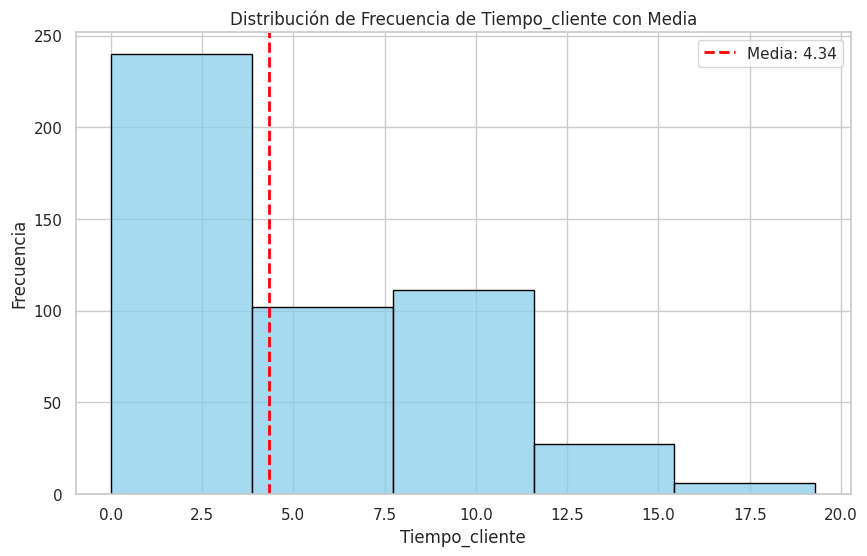

In [31]:
# Verificamos con un histograma la frecuencia de datos en la columna Tiempo cliente
# Creamos el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizamos el método histplot de Seaborn para el gráfico de frecuencia con intervalos
sns.histplot(data=df_clean, x="Tiempo_cliente", bins=5, kde=False, color="skyblue", edgecolor="black")

# Agregamos una línea vertical para la media
mean_salary = df["Tiempo_cliente"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustamos la presentación del gráfico
plt.title("Distribución de Frecuencia de Tiempo_cliente con Media")
plt.xlabel("Tiempo_cliente")
plt.ylabel("Frecuencia")
plt.legend()

# Mostramos el gráfico
plt.show()

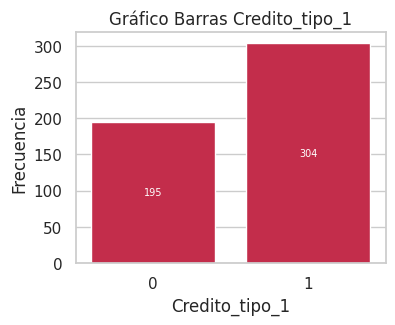

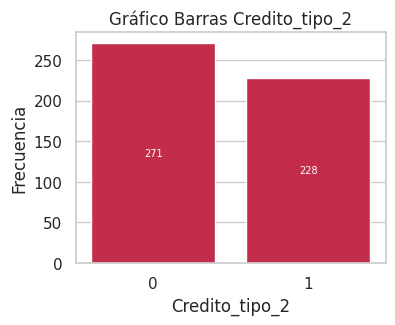

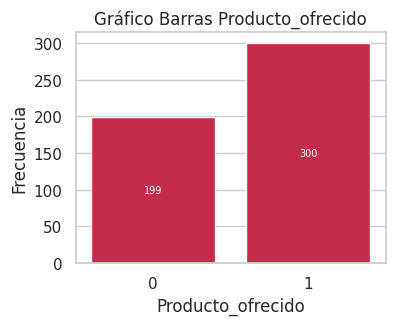

In [32]:
#Graficamos las variables booleanas
col_booleanas = ['Credito_tipo_1','Credito_tipo_2','Producto_ofrecido']
for i in col_booleanas:
    plt.figure(figsize=(4, 3))
    ax = sns.countplot(x=i, data=df, color='crimson')
    plt.title(f"Gráfico Barras {i}")
    ax.set_ylabel("Frecuencia")  # Cambia "eje y" por la etiqueta que desees
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2, p.get_height() / 2, int(p.get_height()), fontsize=7, color='white', ha="center", va="center")
    plt.show()

## Segunda Parte

In [37]:
#Descargamos el paquete de librerias que no estan instaladas por defecto
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=1cabac55e23fe889dc1747075dbc2a6e3a4d6408a23541adcc9d824f55acdf05
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [38]:
# Descargamos las libreria que utilizaremos
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


from sklearn import metrics
from sklearn.metrics import pairwise_distances

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [39]:
#Ulizamos StanderScaler para escalar los datos
scaler = StandardScaler()

df_scaler = df_clean.copy()

# Seleccionamos solo las columnas numéricas para la estandarización
columnas_numericas = df_scaler.select_dtypes(include=['number']).columns

# Aplicamos la estandarización utilizando .loc
df_scaler.loc[:, columnas_numericas] = scaler.fit_transform(df_scaler.loc[:, columnas_numericas])

In [40]:
#Verificamos el nuevp Dataframe
df_scaler.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.167349,0.787401,-0.917011,-0.782148,-0.929211,0.797724
1,-0.276162,0.787401,1.090500,0.365572,-0.929211,0.797724
2,-0.384448,-1.270001,1.090500,-1.368601,-0.929211,-1.253566
3,0.390046,0.787401,-0.917011,-0.748186,-0.929211,0.797724
4,-1.107092,-1.270001,1.090500,-1.246887,-0.929211,-1.253566


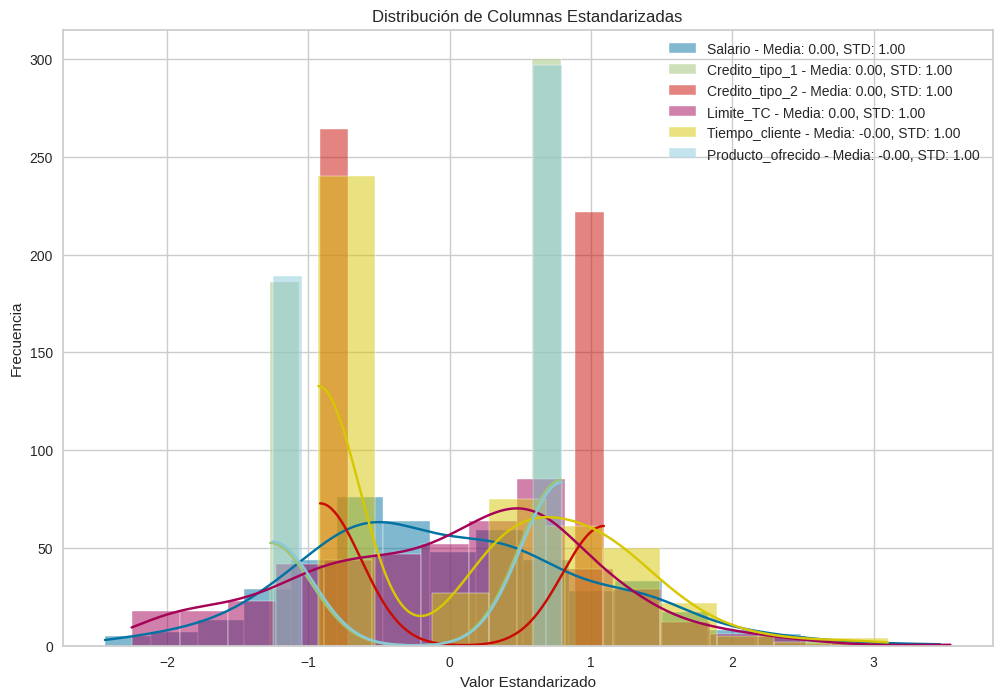

In [41]:
#Visualiamos la estandarización de los datos

plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    sns.histplot(df_scaler[columna], kde=True, label=f'{columna} - Media: {df_scaler[columna].mean():.2f}, STD: {df_scaler[columna].std():.2f}')

plt.title("Distribución de Columnas Estandarizadas")
plt.xlabel("Valor Estandarizado")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [43]:
#Pasamos a la variable X la categorias numericas
X= df_scaler[columnas_numericas]
X.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.167349,0.787401,-0.917011,-0.782148,-0.929211,0.797724
1,-0.276162,0.787401,1.090500,0.365572,-0.929211,0.797724
2,-0.384448,-1.270001,1.090500,-1.368601,-0.929211,-1.253566
3,0.390046,0.787401,-0.917011,-0.748186,-0.929211,0.797724
4,-1.107092,-1.270001,1.090500,-1.246887,-0.929211,-1.253566


In [45]:
#Realizamos un analisis de componentes principales con 2 componentes
pca = PCA(n_components=2)
pca.fit(X) #Entrenamos PCA
X_pca_nc2 = pca.transform(X) #Aplicamos la transformación
X_pca_nc2

array([[ 8.62667240e-01, -2.27109625e+00],
       [-3.69282053e-01,  3.43921879e-01],
       [-2.40298669e+00, -6.71792017e-01],
       [ 4.23084743e-01, -1.33222496e+00],
       [-2.53545405e+00, -2.30541261e-01],
       [ 2.06339063e+00,  4.69477180e-01],
       [ 2.37365049e+00,  1.12511573e+00],
       [-1.14428612e+00,  1.41902725e+00],
       [ 1.65897054e+00,  1.15272000e-01],
       [ 1.26885253e+00, -7.15649307e-02],
       [-2.53415779e+00, -1.51788180e+00],
       [-8.49696322e-01,  2.79266471e+00],
       [ 3.47312922e-01, -1.90779067e+00],
       [-2.48227041e+00,  3.18967704e-01],
       [ 1.94409430e+00, -2.67017375e-01],
       [ 5.94231987e-01, -5.97217722e-02],
       [-8.05901051e-01,  1.60075074e+00],
       [ 5.64042026e-01, -2.89666793e+00],
       [-2.87710890e+00, -5.87117303e-01],
       [-1.76940508e+00,  6.08288899e-01],
       [-1.14324219e+00,  1.33588502e+00],
       [-2.41929719e+00, -8.36573588e-01],
       [ 1.66849259e+00,  1.03894629e-02],
       [ 1.

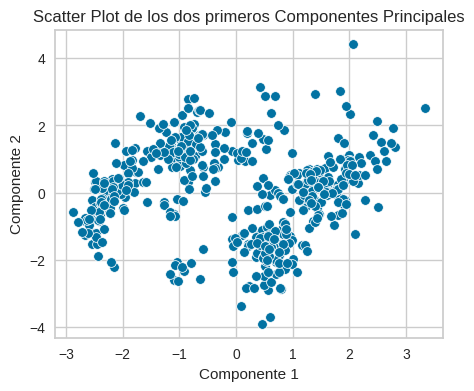

In [46]:
# Creamos un DataFrame con los componentes principales
df_nc2 = pd.DataFrame(data=X_pca_nc2, columns=['Componente 1', 'Componente 2'])

# Graficamos con scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_nc2)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


In [47]:
# Realizamos un nuevo PCA con todos sus compenentes
pca = PCA()
pca.fit(X)

# Obtenemos de este PCA la varianza explicada acumulada
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.36606022, 0.29384935, 0.17102998, 0.12024341, 0.0323232 ,
       0.01649383])

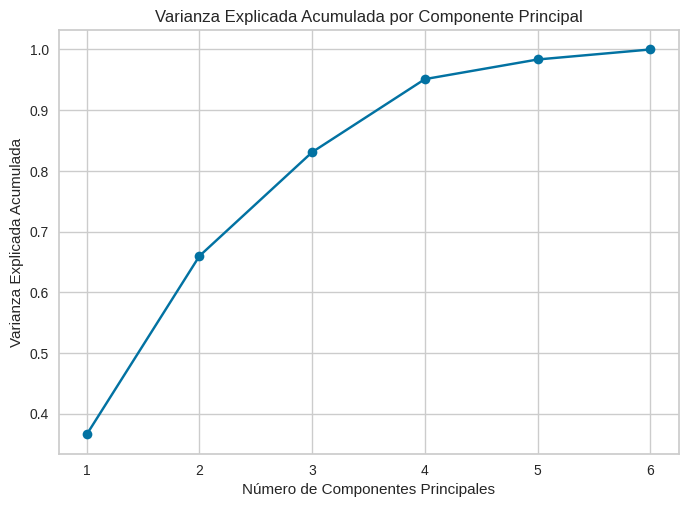

In [48]:
# Creamos un gráfico de la varianza explicada acumulada
acumulative_variance = np.cumsum(variance_ratio)
plt.plot(range(1, len(variance_ratio) + 1), acumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.show()


In [49]:
# Del grafico anterior obtenemos que con 4 compenetes tenemos más del 90% de la varianza
# Por lo anterior realizamos un PCA con 4 componentes
pca = PCA(n_components=4)
pca.fit(X) #Entrenamos PCA
X_pca_nc4 = pca.transform(X) #Aplicamos la transformación
X_pca_nc4

array([[ 0.86266724, -2.27109625,  1.48789582,  0.06799054],
       [-0.36928205,  0.34392188,  0.7010463 , -1.29878627],
       [-2.40298669, -0.67179202, -0.95193984,  0.33829121],
       ...,
       [-2.36401855, -1.47310611, -0.56306224,  0.94041487],
       [ 0.58753841, -1.68730543,  1.07832382, -0.53318237],
       [ 2.73169752,  1.4852663 ,  0.531126  ,  0.89123073]])

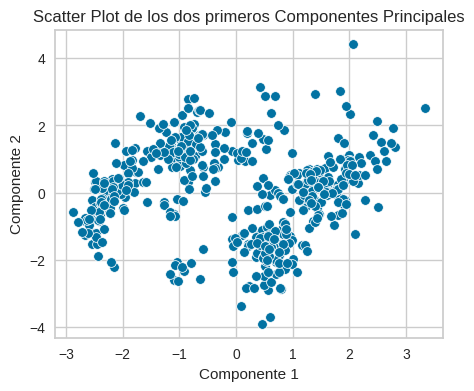

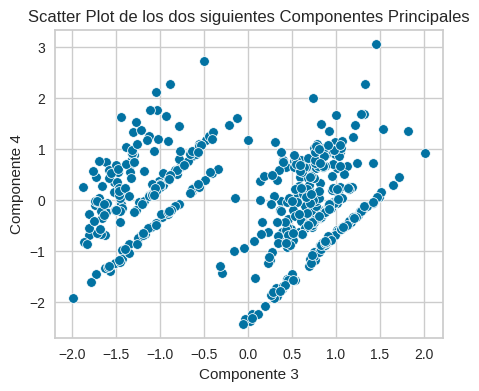

In [50]:
# Graficamos para ver la intereacción de cada una de las compenentes entre si
# Creamos un DataFrame con los componentes principales
df_nc4 = pd.DataFrame(data=X_pca_nc4, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4'])

# Graficamos scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Graficamos scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 3', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 3')
plt.ylabel('Componente 4')
plt.show()

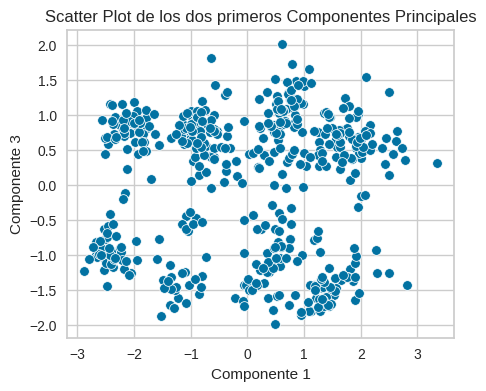

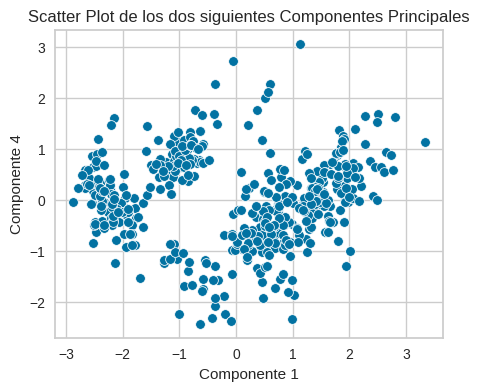

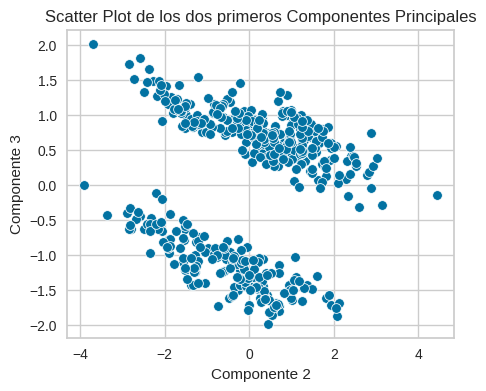

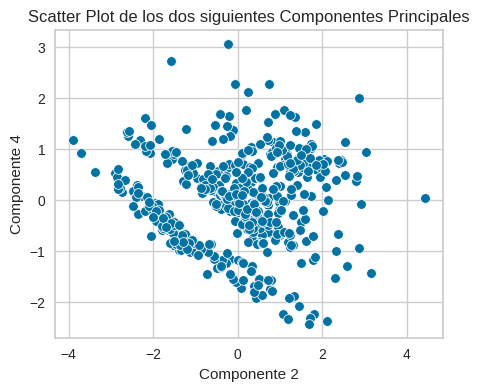

In [52]:
# Luego graficasmos las demas interacciones entre las componentes
# Graficamos scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 3', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 3')
plt.show()

# Graficamos scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 4')
plt.show()

# Graficamos scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 2', y='Componente 3', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 2')
plt.ylabel('Componente 3')
plt.show()

# Graficamos scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 2', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 2')
plt.ylabel('Componente 4')
plt.show()



#### Metódo del Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

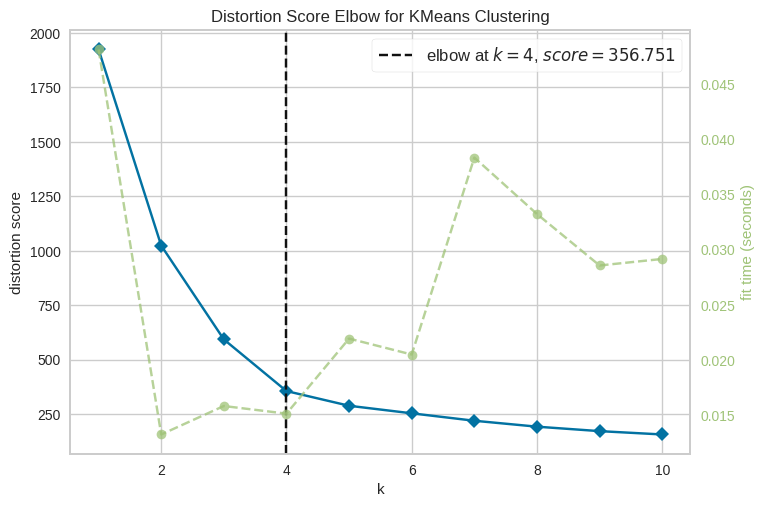

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
#Para verificar cual es numeor optimo de cluster realizamos el metodo del codo
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X_pca_nc2) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

In [54]:
# Entrenamos el modelo con 4 clusters de acuerdo al resultado del metodo del codo
kmeans_pca = KMeans(n_clusters = 4,  n_init = 'auto').fit(X_pca_nc2)
labels = kmeans_pca.labels_ # Obtención de las etiquetas de los clusters para cada muestra

centroides = kmeans_pca.cluster_centers_
#centroides = df_cluster.groupby('Cluster').mean() ##Otra alternativa de obtener los centroides
print(centroides)

[[ 0.43864866 -1.78747119]
 [-2.16188449 -0.30332226]
 [-0.71193518  1.40568688]
 [ 1.60384149  0.38904353]]


In [57]:
#Guardamos en un nuevo dataframe el resultado del PCA con dos componentes

df_cluster = pd.DataFrame({'Componente Principal 1': X_pca_nc2[:, 0],
                   'Componente Principal 2': X_pca_nc2[:, 1],
                   'Cluster': labels})

df_cluster.head()

,Componente Principal 1,Componente Principal 2,Cluster
0,0.862667,-2.271096,0
1,-0.369282,0.343922,2
2,-2.402987,-0.671792,1
3,0.423085,-1.332225,0
4,-2.535454,-0.230541,1


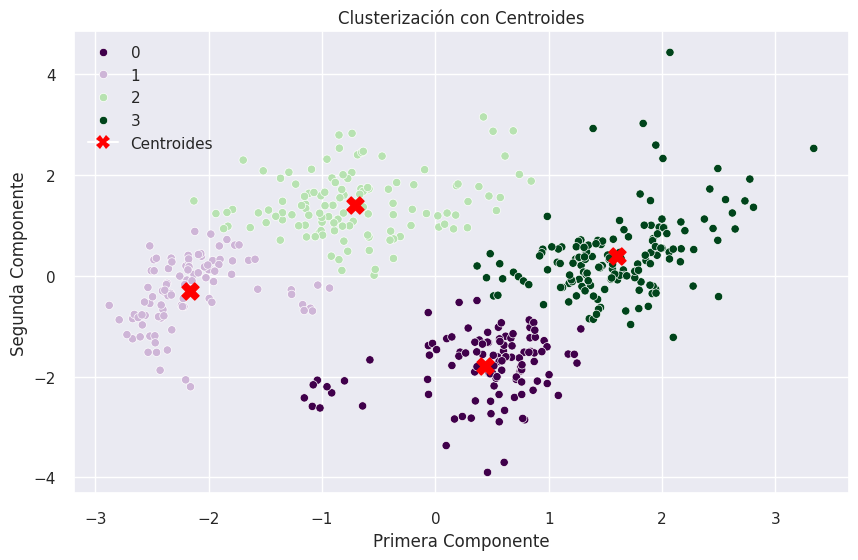

In [72]:

# Graficamos
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', palette='PRGn')

# Centroide
plt.scatter(centroides[:,0], centroides[:,1], marker='X', s=150, color='red')

#Etiquetas
plt.xlabel('Primera Componente')
plt.ylabel('Segunda Componente')
plt.title('Clusterización con Centroides')

centroide_leyenda = plt.Line2D([], [], marker='X', color='w', label='Centroides', markerfacecolor='red', markersize=10)
cluster_leyenda = plt.gca().get_legend_handles_labels()
plt.legend(handles=[*cluster_leyenda[0], centroide_leyenda], labels=[*cluster_leyenda[1], 'Centroides'])

plt.show()


In [73]:
#Revisamos metrica de Davis Bouldin
davies_bouldin = davies_bouldin_score(X_pca_nc2, labels)
davies_bouldin

0.6137279531507887

In [60]:
#Revisamos metrica del analisis de silueta
silhouette = silhouette_score(X_pca_nc2, labels)
silhouette


0.5369875674663571

In [61]:
#Revisamos metrica de Calinski Harabasz
calinski_harabasz = calinski_harabasz_score(X_pca_nc2, labels)
print("Índice Calinski-Harabasz:", calinski_harabasz)

Índice Calinski-Harabasz: 705.6270148179773


### Interpreación de la metrica

**Índice de Silhouette**: Un valor cercano a 1 indica una buena asignación de
puntos a clusters.

**Índice de Calinski-Harabasz:** Un valor alto indica clusters bien separados.

**Índice de Davies-Bouldin:** Un valor bajo indica clusters bien separados.

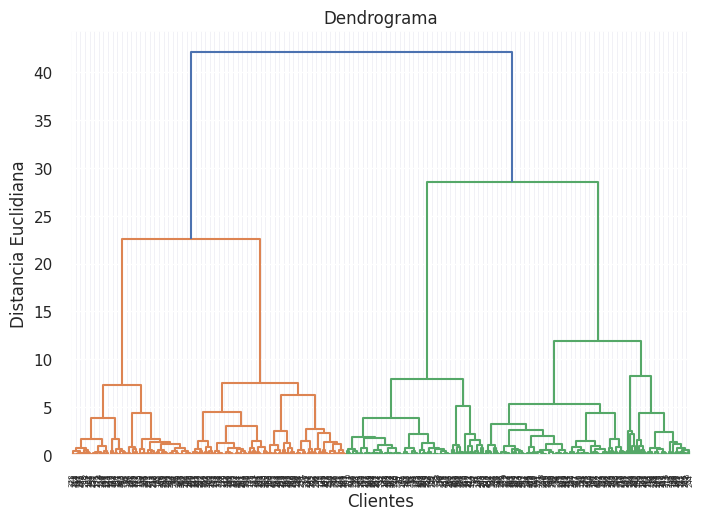

In [74]:
#Graficamos un dendograma. Esto nos permitirá ver cómo se distribuyen los clusters y cómo se relacionan entre sí.

dendrograma = hc.dendrogram(hc.linkage(X_pca_nc2, method = 'ward'))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

### Bonus Track

In [63]:
#Cargamos el nuevo dataset
df_newc = pd.read_csv('https://raw.githubusercontent.com/ocatalanh/och_datascience/main/ProyectoM4_Modelado_no_supervisado/new_costumer.csv')
df_newc.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [64]:
#Analizamos al información
df_newc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [66]:
#Revisamos los datos estadisticos
df_newc.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,50.0,13232.1144,5767.078320,-638.96,9783.8875,12849.835,16788.6725,23890.65
Credito_tipo_1,50.0,0.5200,0.504672,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,50.0,0.5000,0.505076,0.00,0.0000,0.500,1.0000,1.00
Limite_TC,50.0,38422.6698,20240.655015,-2756.45,22922.6175,39054.305,52052.3200,83578.93
Tiempo_cliente,50.0,2.9440,3.973338,0.00,0.0000,0.000,6.3500,11.30
Producto_ofrecido,50.0,0.7000,0.462910,0.00,0.0000,1.000,1.0000,1.00
Tipo_de_cliente,50.0,1.3800,1.122861,0.00,0.0000,1.000,2.0000,3.00


In [67]:
#Revisamos su correlación
corr = df_newc.corr()
corr.style.background_gradient(cmap='coolwarm')

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
Salario,1.000000,0.332185,-0.665767,-0.587361,-0.311375,0.007842,0.245237
Credito_tipo_1,0.332185,1.000000,-0.720577,0.161237,-0.263026,0.069886,0.040335
Credito_tipo_2,-0.665767,-0.720577,1.000000,0.262217,0.276605,0.218218,-0.269887
Limite_TC,-0.587361,0.161237,0.262217,1.000000,0.600622,0.356433,-0.458487
Tiempo_cliente,-0.311375,-0.263026,0.276605,0.600622,1.000000,0.158224,-0.228421
Producto_ofrecido,0.007842,0.069886,0.218218,0.356433,0.158224,1.000000,-0.325881
Tipo_de_cliente,0.245237,0.040335,-0.269887,-0.458487,-0.228421,-0.325881,1.000000


In [68]:
#Creamos una función que acepte como argumento los nuevos datos y el modelo, para que entregue las etiquetas
def aplicar_modelo(df_nuevo, modelo):

  try:

    df_scaler = df_nuevo.copy()

    # Seleccionar solo las columnas numéricas para la estandarización
    columnas_numericas = df_scaler.select_dtypes(include=['number']).columns

    # Aplicar la estandarización utilizando .loc
    df_scaler.loc[:, columnas_numericas] = scaler.fit_transform(df_scaler.loc[:, columnas_numericas])


    pca = PCA(n_components=2)
    pca.fit(df_scaler)

    X_pca = pca.transform(df_scaler)

    etiquetas = modelo.predict(X_pca)

    return etiquetas

  except Exception as e:
    print(f"Error al aplicar el modelo: {e}")
    return None



In [69]:
# Aplicar la función al DataFrame
etiquetas = aplicar_modelo(df_newc, kmeans_pca)

#Agregar la columna 'Cluster' al DataFrame original
df_newc['Cluster'] = etiquetas

# Mostrar el DataFrame
df_newc.head()




<ipython-input-68-619b9a8c6740>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_scaler.loc[:, columnas_numericas] = scaler.fit_transform(df_scaler.loc[:, columnas_numericas])


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente,Cluster
0,19028.02,1,0,18845.91,0.0,1,3,1
1,17004.81,1,0,16421.36,0.0,0,2,1
2,12973.54,1,0,57295.44,9.6,1,2,0
3,13995.43,0,0,23556.17,7.7,0,3,2
4,13155.66,0,1,61073.59,10.2,1,0,3


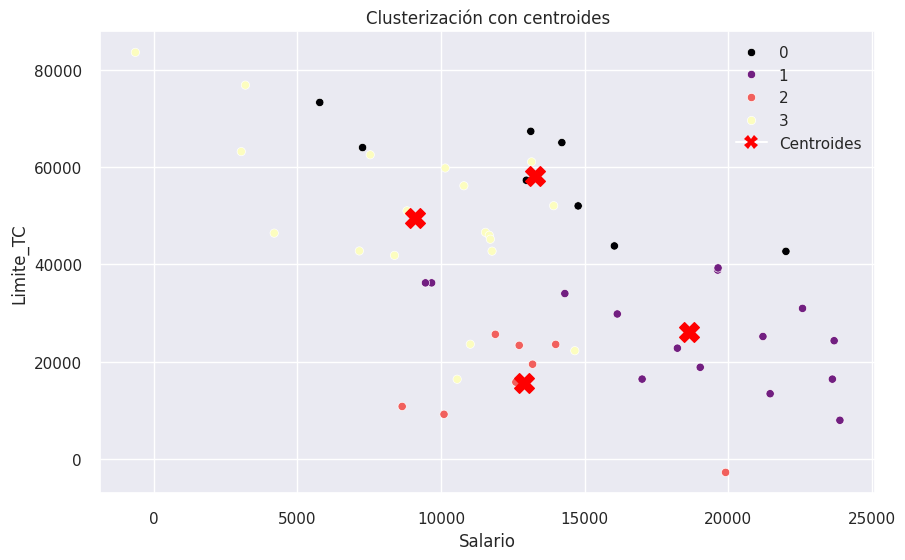

In [71]:
#Graficamos los nuevos datos con la agrupación del modelo
nuevos_centroides = df_newc.groupby('Cluster').mean()

sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_newc, x='Salario', y='Limite_TC', hue='Cluster', palette='magma')


plt.scatter(nuevos_centroides['Salario'], nuevos_centroides['Limite_TC'], marker='X', s=200, color='red')

plt.xlabel('Salario')
plt.ylabel('Limite_TC')

plt.title('Clusterización con centroides')

centroide_leyenda = plt.Line2D([], [], marker='X', color='w', label='Centroides', markerfacecolor='red', markersize=10)
cluster_leyenda = plt.gca().get_legend_handles_labels()
plt.legend(handles=[*cluster_leyenda[0], centroide_leyenda], labels=[*cluster_leyenda[1], 'Centroides'])

plt.show()